In [2]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
file_path = 'taxi_trajectories/train.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
df.shape




(1710670, 9)

In [8]:
# filter data fram to trip_id = df[df['TAXI_ID'] == '1399089516620000665'].head()
df[df['TRIP_ID'] == 1399089516620000665].head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
1406116,1399089516620000665,C,NaN,NaN,20000665,1399089516,A,False,"[[-8.614296,41.162778],[-8.614377,41.162418],[..."


In [24]:
# filter missing data
df = df[df['MISSING_DATA'] == False]

df.shape

(1710660, 10)

In [25]:
# Polyline cleanup

# Convert POLYLINE from string to list
df['POLYLINE'] = df['POLYLINE'].apply(ast.literal_eval)

# POLYLINE should contain at least two GPS points for valid trajectories.
# Filter rows with less than 2 GPS points
df = df[df['POLYLINE'].apply(len) > 1]

In [28]:
# Compute trajectory lengths
df['TRAJECTORY_LENGTH'] = df['POLYLINE'].apply(len)

df.head()

,Unnamed: 0,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,TRAJECTORY_LENGTH
0,0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",23
1,1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847, 41.159826], [-8.640351, 41.159871...",19
2,2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",65
3,3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",43
4,4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",29


In [29]:
# Compute basic statistics
average_length = df['TRAJECTORY_LENGTH'].mean()
max_length = df['TRAJECTORY_LENGTH'].max()
min_length = df['TRAJECTORY_LENGTH'].min()
median_length = df['TRAJECTORY_LENGTH'].median()

print(f"Average Trajectory Length: {average_length}")
print(f"Maximum Trajectory Length: {max_length}")
print(f"Minimum Trajectory Length: {min_length}")
print(f"Median Trajectory Length: {median_length}")

Average Trajectory Length: 49.80301071826214
Maximum Trajectory Length: 3881
Minimum Trajectory Length: 2
Median Trajectory Length: 42.0


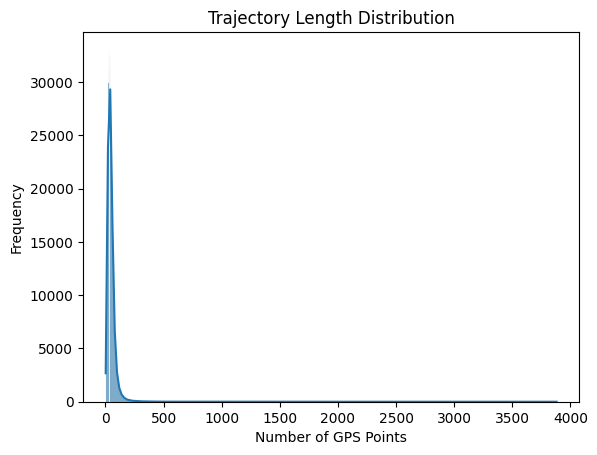

In [36]:
sns.histplot(df['TRAJECTORY_LENGTH'], bins=4000, kde=True)
plt.title('Trajectory Length Distribution')
plt.xlabel('Number of GPS Points')
plt.ylabel('Frequency')
plt.show()

In [38]:
df = df[df['TRAJECTORY_LENGTH'] <= 500]
df.shape

(1672092, 11)

In [39]:
# save the cleaned dataset
df.to_csv('taxi_trajectories/taxi_cleaned.csv')